<a href="https://colab.research.google.com/github/charookc5/AIML_internship/blob/main/AIML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy (K=3):", accuracy_score(y_test, y_pred))


Accuracy (K=3): 1.0


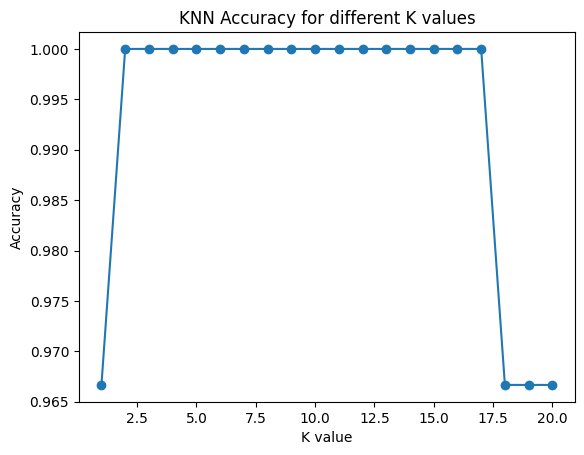

In [5]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for different K values")
plt.show()


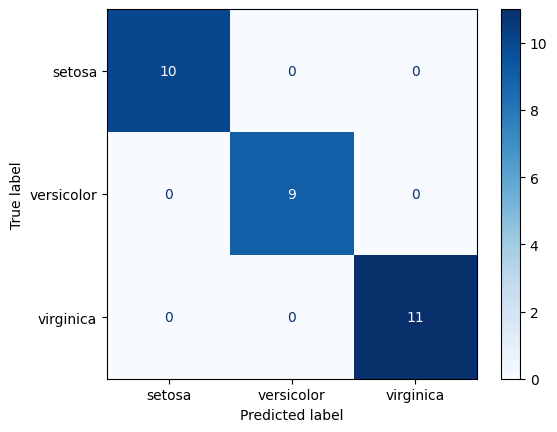

In [6]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


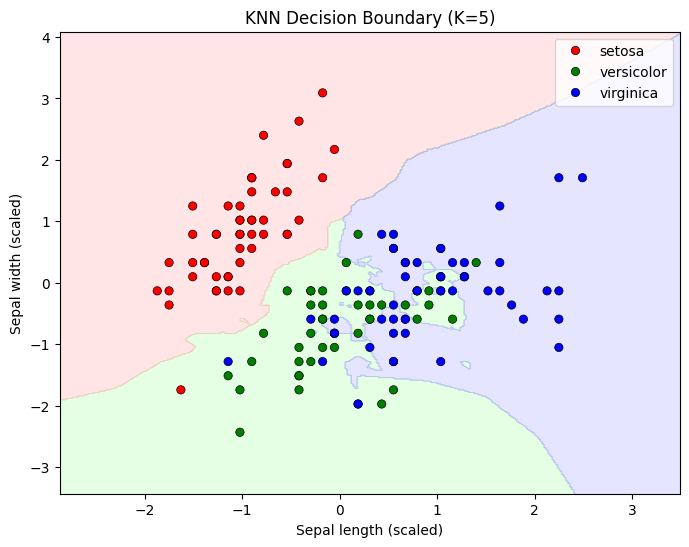

In [7]:
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]  # take only first 2 features
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=iris.target_names[y],
                palette=cmap_bold, edgecolor="k")
plt.title("KNN Decision Boundary (K=5)")
plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.show()
